In [1]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as data

start = '2015, 1, 1'
end = date.today().strftime('%Y-%m-%d')

company = 'SBIN.NS'
df = data.DataReader(company , 'yahoo', start , end)
df.head()
df.tail()
df = df.reset_index()
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-01,315.000000,310.700012,312.450012,314.000000,6138488.0,300.547516
1,2015-01-02,318.299988,314.350006,314.350006,315.250000,9935094.0,301.743988
2,2015-01-05,316.799988,312.100006,316.250000,312.750000,9136716.0,299.351044
3,2015-01-06,311.100006,298.700012,310.000000,299.899994,15329257.0,287.051575
4,2015-01-07,302.549988,295.149994,300.000000,300.149994,15046745.0,287.290863


In [2]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,315.000000,310.700012,312.450012,314.000000,6138488.0
1,318.299988,314.350006,314.350006,315.250000,9935094.0
2,316.799988,312.100006,316.250000,312.750000,9136716.0
3,311.100006,298.700012,310.000000,299.899994,15329257.0
4,302.549988,295.149994,300.000000,300.149994,15046745.0


In [3]:
df.tail(1)

,High,Low,Open,Close,Volume
1664,464.399994,451.600006,453.799988,463.149994,16244753.0


(1665,)

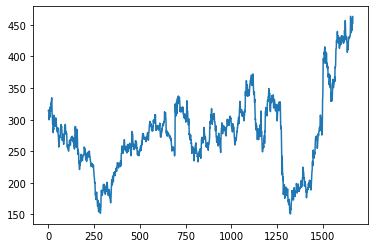

In [4]:
plt.plot(df['Close'])

df.Close.shape

In [5]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1660    422.678501
1661    423.723001
1662    424.670501
1663    425.570001
1664    426.555001
Name: Close, Length: 1665, dtype: float64

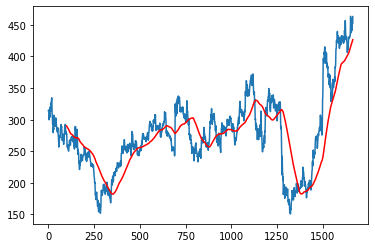

In [6]:
plt.Figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [7]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1660    379.730251
1661    380.670751
1662    381.584001
1663    382.494501
1664    383.448001
Name: Close, Length: 1665, dtype: float64

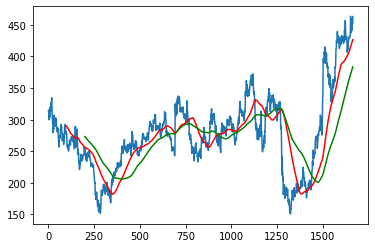

In [8]:
plt.Figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [9]:
df.shape

(1665, 5)

In [10]:
data_tran = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_tran.shape)
print(data_test.shape)

(1165, 1)
(500, 1)


In [12]:
data_tran.head()

,Close
0,314.000000
1,315.250000
2,312.750000
3,299.899994
4,300.149994


In [13]:
data_test.head()

,Close
1165,281.850006
1166,281.200012
1167,270.799988
1168,255.949997
1169,254.149994


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_tran_array = scaler.fit_transform(data_tran)
data_tran_array


array([[0.73526747],
       [0.74093383],
       [0.7296011 ],
       ...,
       [0.7341342 ],
       [0.68359025],
       [0.58227562]])

In [15]:
data_tran_array.shape

(1165, 1)

In [16]:
x_train = []
y_train = []

for i in range(100, data_tran_array.shape[0]):
    x_train.append(data_tran_array[i-100:i])
    y_train.append(data_tran_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1065, 100, 1)
(1065,)


In [17]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences =True,
               input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences =True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu', return_sequences =True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1, activation= 'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
34/34 [==============================] - 13s 234ms/step - loss: 0.0780 - acc: 0.0019

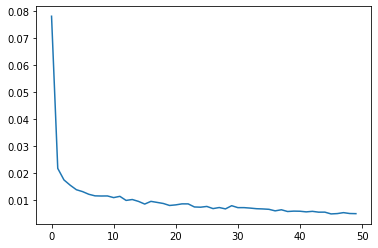

In [51]:
ls = model.history.history['loss']
plt.plot(ls)

In [ ]:
model.save('test_model.h5')

In [21]:
data_test.head()
len(data_test)

500

In [52]:
data_tran.tail(100)

,Close
1065,308.149994
1066,310.000000
1067,308.750000
1068,305.450012
1069,298.250000
...,...
1160,274.049988
1161,301.700012
1162,313.750000
1163,302.600006


In [53]:
past_100_days = data_tran.tail(100)
final_df = past_100_days.append(data_test, ignore_index=True)

In [54]:
# len(final_df)
final_df.head()
final_df.shape

(600, 1)

In [55]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.50279682],
       [0.50871022],
       [0.50471469],
       [0.49416654],
       [0.47115228],
       [0.47450848],
       [0.50247716],
       [0.49880129],
       [0.52357355],
       [0.51542272],
       [0.52708963],
       [0.5382771 ],
       [0.61962603],
       [0.59677155],
       [0.60811889],
       [0.61163498],
       [0.65366788],
       [0.67396517],
       [0.66869099],
       [0.63225183],
       [0.64791426],
       [0.64455806],
       [0.65398754],
       [0.6442384 ],
       [0.59469389],
       [0.61115544],
       [0.61834738],
       [0.62729741],
       [0.61738849],
       [0.62537954],
       [0.61674917],
       [0.59773053],
       [0.6047626 ],
       [0.60092695],
       [0.62106436],
       [0.63464914],
       [0.6467956 ],
       [0.65750352],
       [0.66261782],
       [0.6754035 ],
       [0.67252674],
       [0.67348562],
       [0.6829151 ],
       [0.68818918],
       [0.6921847 ],
       [0.70257307],
       [0.653508  ],
       [0.666

In [26]:
input_data.shape

(600, 1)

In [56]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data [i-100: i])
    y_test.append(input_data[i])

In [57]:
x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(500, 100, 1)
(500, 1)


In [58]:
# Making Predictions
y_predicted = model.predict(x_test)

In [30]:
y_predicted.shape

(500, 1)

In [31]:
y_test.shape

(500, 1)

In [32]:
len(y_predicted)

500

In [59]:
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test)

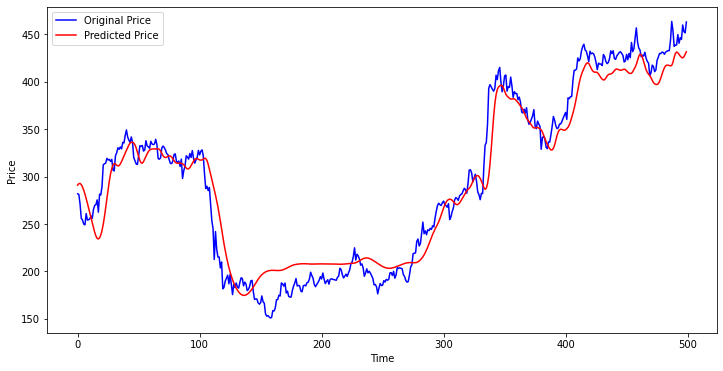

In [60]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
# Predict Next Day

real_data = [input_data[len(input_data) + 1 - 100:len(input_data )]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
print(real_data.shape)

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

(1, 99, 1)
Prediction: [[414.52832]]


In [36]:
# prediction for next 30 days
len(input_data)

600

In [37]:
# last 100 days data
future_input = input_data[len(input_data)-100:]

In [38]:
future_input = future_input.reshape(1,-1)
future_input.shape

(1, 100)

In [39]:
temporary_input = list(future_input)
temporary_input = temporary_input[0].tolist()

In [40]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while i<30:

    if len(temporary_input)>100:
        future_input = np.array(temporary_input[1:])
        future_input=future_input.reshape(1,-1)
        future_input = future_input.reshape((1, n_steps, 1))
        yhat = model.predict(future_input, verbose=0)
        temporary_input.extend(yhat[0].tolist())
        temporary_input = temporary_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        future_input = future_input.reshape((1, n_steps,1))
        yhat = model.predict(future_input, verbose=0)
        temporary_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[0.8428265452384949], [0.8415452837944031], [0.8262653946876526], [0.800809383392334], [0.7695621252059937], [0.7362064719200134], [0.7031417489051819], [0.6717529296875], [0.6428605914115906], [0.6168026924133301], [0.5936182141304016], [0.573177695274353], [0.5552396774291992], [0.5395393371582031], [0.5258126854896545], [0.5138258934020996], [0.5033801794052124], [0.49430593848228455], [0.48640745878219604], [0.4794839024543762], [0.47334444522857666], [0.4678216576576233], [0.4627780616283417], [0.45810410380363464], [0.4537156820297241], [0.4495566487312317], [0.44558951258659363], [0.44179195165634155], [0.43816107511520386], [0.4346981644630432]]


In [41]:
len(input_data)

600

In [42]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

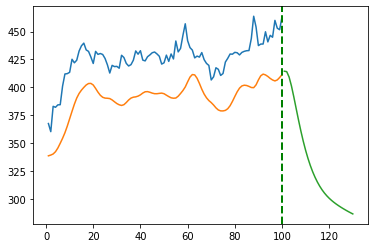

In [43]:
plt.plot(plot_new, scaler.inverse_transform(input_data[len(input_data)-100:]))
plt.plot(plot_new,y_predicted[len(y_predicted)- 100:])
plt.plot(plot_pred, scaler.inverse_transform(lst_output))
plt.axvline(x = 100, color='green', linewidth=2, linestyle='--')

In [44]:
lst_output = scaler.inverse_transform(lst_output)

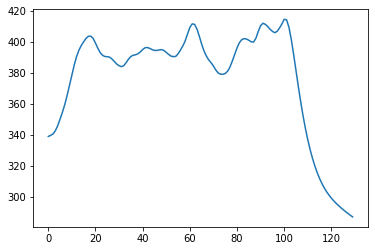

In [45]:
mi_new = y_predicted.tolist()
mi_new.extend(lst_output)
plt.plot(mi_new[400:])

In [45]:
#Creating final data for plotting
# final_graph = scaler.inverse_transform(mi_new).tolist()

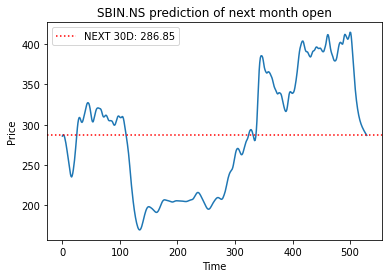

In [46]:
#Plotting final results with predicted value after 30 Days
plt.plot(mi_new)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format('SBIN.NS'))
plt.axhline(y=mi_new[len(mi_new)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*mi_new[len(mi_new)-1]),2)))
plt.legend()


In [47]:
print("30th day prediction:{0}".format(round(float(*lst_output[len(lst_output) - 1]), 2)))


30th day prediction:286.85


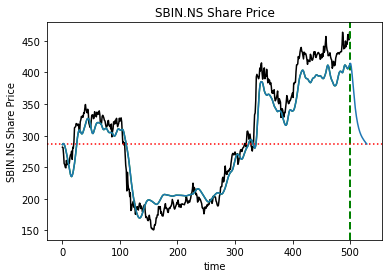

In [48]:
plt.plot(y_test, color="black", label=f"Actual {company} Price")
plt.plot(y_predicted, color='green', label=f"Predicted {company} Price")
plt.axvline(x=len(y_predicted),color='green', linewidth=2, linestyle='--')
plt.axhline(y=mi_new[len(mi_new)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*lst_output[len(lst_output)-1]),2)))
plot_pre=np.arange(len(y_predicted),len(y_predicted)+30)
plt.plot(mi_new)
# plt.plot(final_graph)
plt.title(f"{company} Share Price")
plt.xlabel('time')
plt.ylabel(f'{company} Share Price')
plt.show()
